## Customer Churn Dataset


#### Domain - Telecommunication
#### Dataset - Click here to download the dataset:https://drive.google.com/file/d/1Wp2ioU0gHFyFEA2NJ10-IjzmMCsUbWEe/view?usp=sharing


#### The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


### Business Understanding

The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues: 
1. Acquire new customers 
2. Upsell the existing customers
3. Increase the retention period of customers 
However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proving that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as "the customer movement from one provider to another".

Customer churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.

Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide. Even though it is not the most fun to look at, customer churn metrics can help businesses improve customer retention.


#### Problem Statement :
- Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

#### Task - Prepare the Data and build a model to predict the churn of a customer.

### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

### Step - 1: Load the data

In [3]:
churn=pd.read_csv(r"C:\Users\Irfan\Downloads\churn_dataset.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
## Typeconversion

In [9]:
churn['TotalCharges']=churn['TotalCharges'].replace(' ',np.nan)

In [10]:
churn['TotalCharges']=churn['TotalCharges'].astype(float)

In [11]:
churn.dropna(inplace=True)

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
num=churn.select_dtypes(include='number')
cat=churn.select_dtypes(exclude='number')

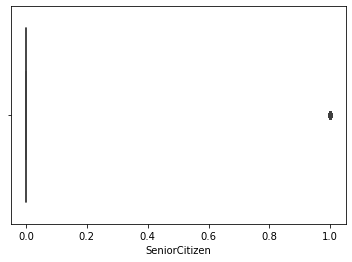

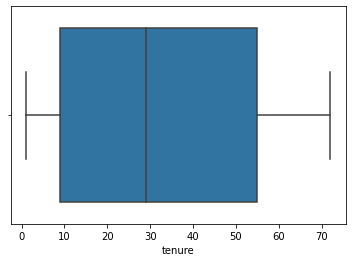

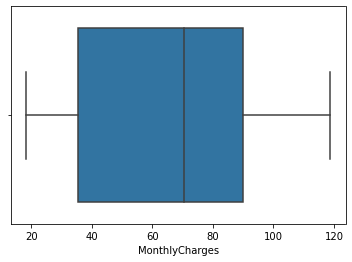

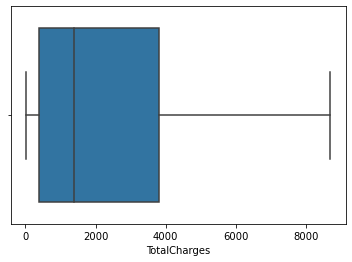

In [14]:
for i in num:
    sns.boxplot(churn[i])
    plt.show()

In [15]:
churn.drop('customerID',axis=1,inplace=True)

In [16]:
churn.duplicated().sum()

22

In [17]:
### Removing_duplicates
churn.drop_duplicates(inplace=True)

In [18]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
import os
os.getcwd()
churn.to_csv('C:\\Users\\Irfan\\Machine Learning\\churn.csv')

In [20]:
churn=pd.read_csv("churn.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


#### Step - 2: Document the below mentioned points properly:

- Inputvariables:gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,
   OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,
   PaymentMethod,MonthlyCharges,TotalCharges.
- Target variable:Churn
- Type:Supervised Learning(since target variable is given).
- Task:classification
- Identify the Evaluation Metric.
- classification task: Accuracy

In [23]:
X=churn[[ 'gender', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y=churn['Churn']

### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5257, 18) (5257,)
(1753, 18) (1753,)


In [25]:
churn['PaymentMethod'].value_counts()

Electronic check             2359
Mailed check                 1588
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [26]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_cat=X_train.select_dtypes(include='object')


### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_trans = pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_train_num_trans.head()

,tenure,MonthlyCharges,TotalCharges
5882,-1.278333,0.669911,-0.969428
4371,-0.094301,1.182861,0.293170
1978,1.048902,1.464318,1.777069
3182,0.436472,-0.311024,0.030111
3661,-1.278333,-1.478487,-0.997990


In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names(X_train_cat.columns),
                              index = X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5882,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4371,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1978,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3182,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3661,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## concat train_data

In [29]:
X_train_transformed = pd.concat([X_train_num_trans,X_train_cat_ohe],axis =1)
X_train_transformed.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5882,-1.278333,0.669911,-0.969428,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4371,-0.094301,1.182861,0.293170,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1978,1.048902,1.464318,1.777069,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3182,0.436472,-0.311024,0.030111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3661,-1.278333,-1.478487,-0.997990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [30]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_cat=X_test.select_dtypes(include='object')

In [31]:
X_test_num_trans = pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index = X_test_num.index)
X_test_num_trans.head()

,tenure,MonthlyCharges,TotalCharges
6850,1.579675,1.157880,2.172952
6723,-0.829218,-0.500883,-0.762586
245,-1.155847,0.348484,-0.886000
1880,-0.747560,-1.125417,-0.821215
6798,0.109842,-1.488480,-0.704000


In [32]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                             columns=encoder.get_feature_names(X_test_cat.columns),
                             index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6850,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
245,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1880,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6798,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### Concat test data

In [33]:
X_test_transformed = pd.concat([X_test_num_trans,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6850,1.579675,1.157880,2.172952,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6723,-0.829218,-0.500883,-0.762586,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
245,-1.155847,0.348484,-0.886000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1880,-0.747560,-1.125417,-0.821215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6798,0.109842,-1.488480,-0.704000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest
### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).
### Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.

In [34]:
Algorithm=[]
Accuracy_score=[]
Precision_score=[]
# Confusion_matrix=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

In [35]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

print(a)

0.8208784940102681


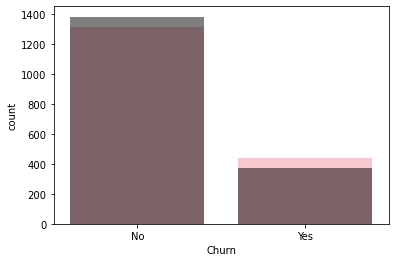

In [36]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classification=KNeighborsClassifier()
KNN_classification.fit(X_train_transformed,y_train)
y_test_pred=KNN_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
# Log_Los.append(metrics.log_loss(y_test,y_test_pred))

print(a)

0.7569880205362236


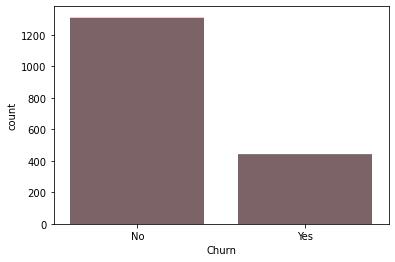

In [38]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train_transformed,y_train)
y_test_pred = dc.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.7318881916714204


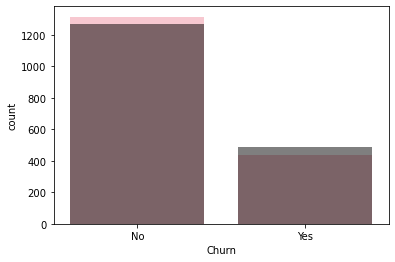

In [40]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [41]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train_transformed,y_train)
y_test_pred = sv.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Support Vector classification")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

print(a)

0.8220193953223046


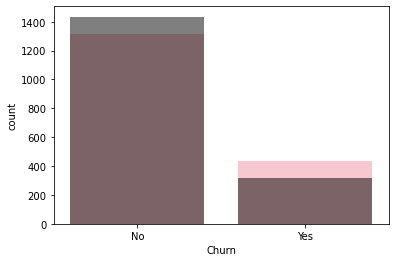

In [42]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,y_train)
y_test_pred = rf.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("RandomForestClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

print(a)

0.7969195664575014


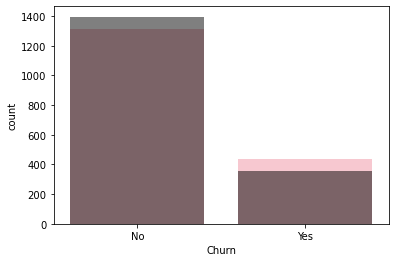

In [44]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_transformed,y_train)
y_test_pred = gb.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.8128921848260126


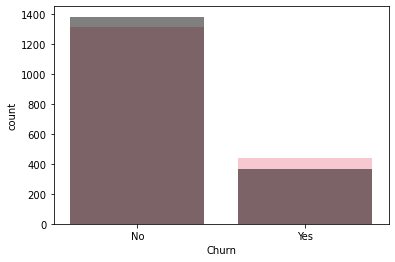

In [46]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train_transformed,y_train)
y_test_pred = ab.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.8157444381061039


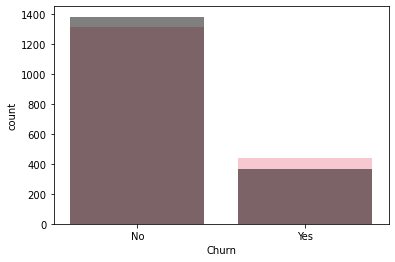

In [48]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [49]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_transformed,y_train)
y_test_pred = nb.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Naive bayes Algorithem")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.7164860239589276


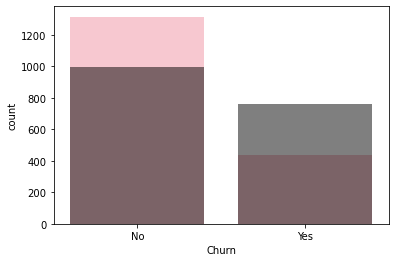

In [50]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [51]:
print(len(F1_score))

8


In [52]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score,'Precision_score':Precision_score,'F1_score':F1_score},index=Algorithm)
overview

,Accuracy_score,Precision_score,F1_score
LogisticRegression,0.820878,0.862419,0.883531
KNeighborsClassifier,0.756988,0.840092,0.837529
DecisionTreeClassifier,0.731888,0.833465,0.817971
Support Vector classification,0.822019,0.849477,0.886545
RandomForestClassifier,0.796920,0.843728,0.868635
GradientBoostingClassifier,0.812892,0.856318,0.878519
AdaBoostClassifier,0.815744,0.858382,0.880326
Naive bayes Algorithem,0.716486,0.911469,0.784755


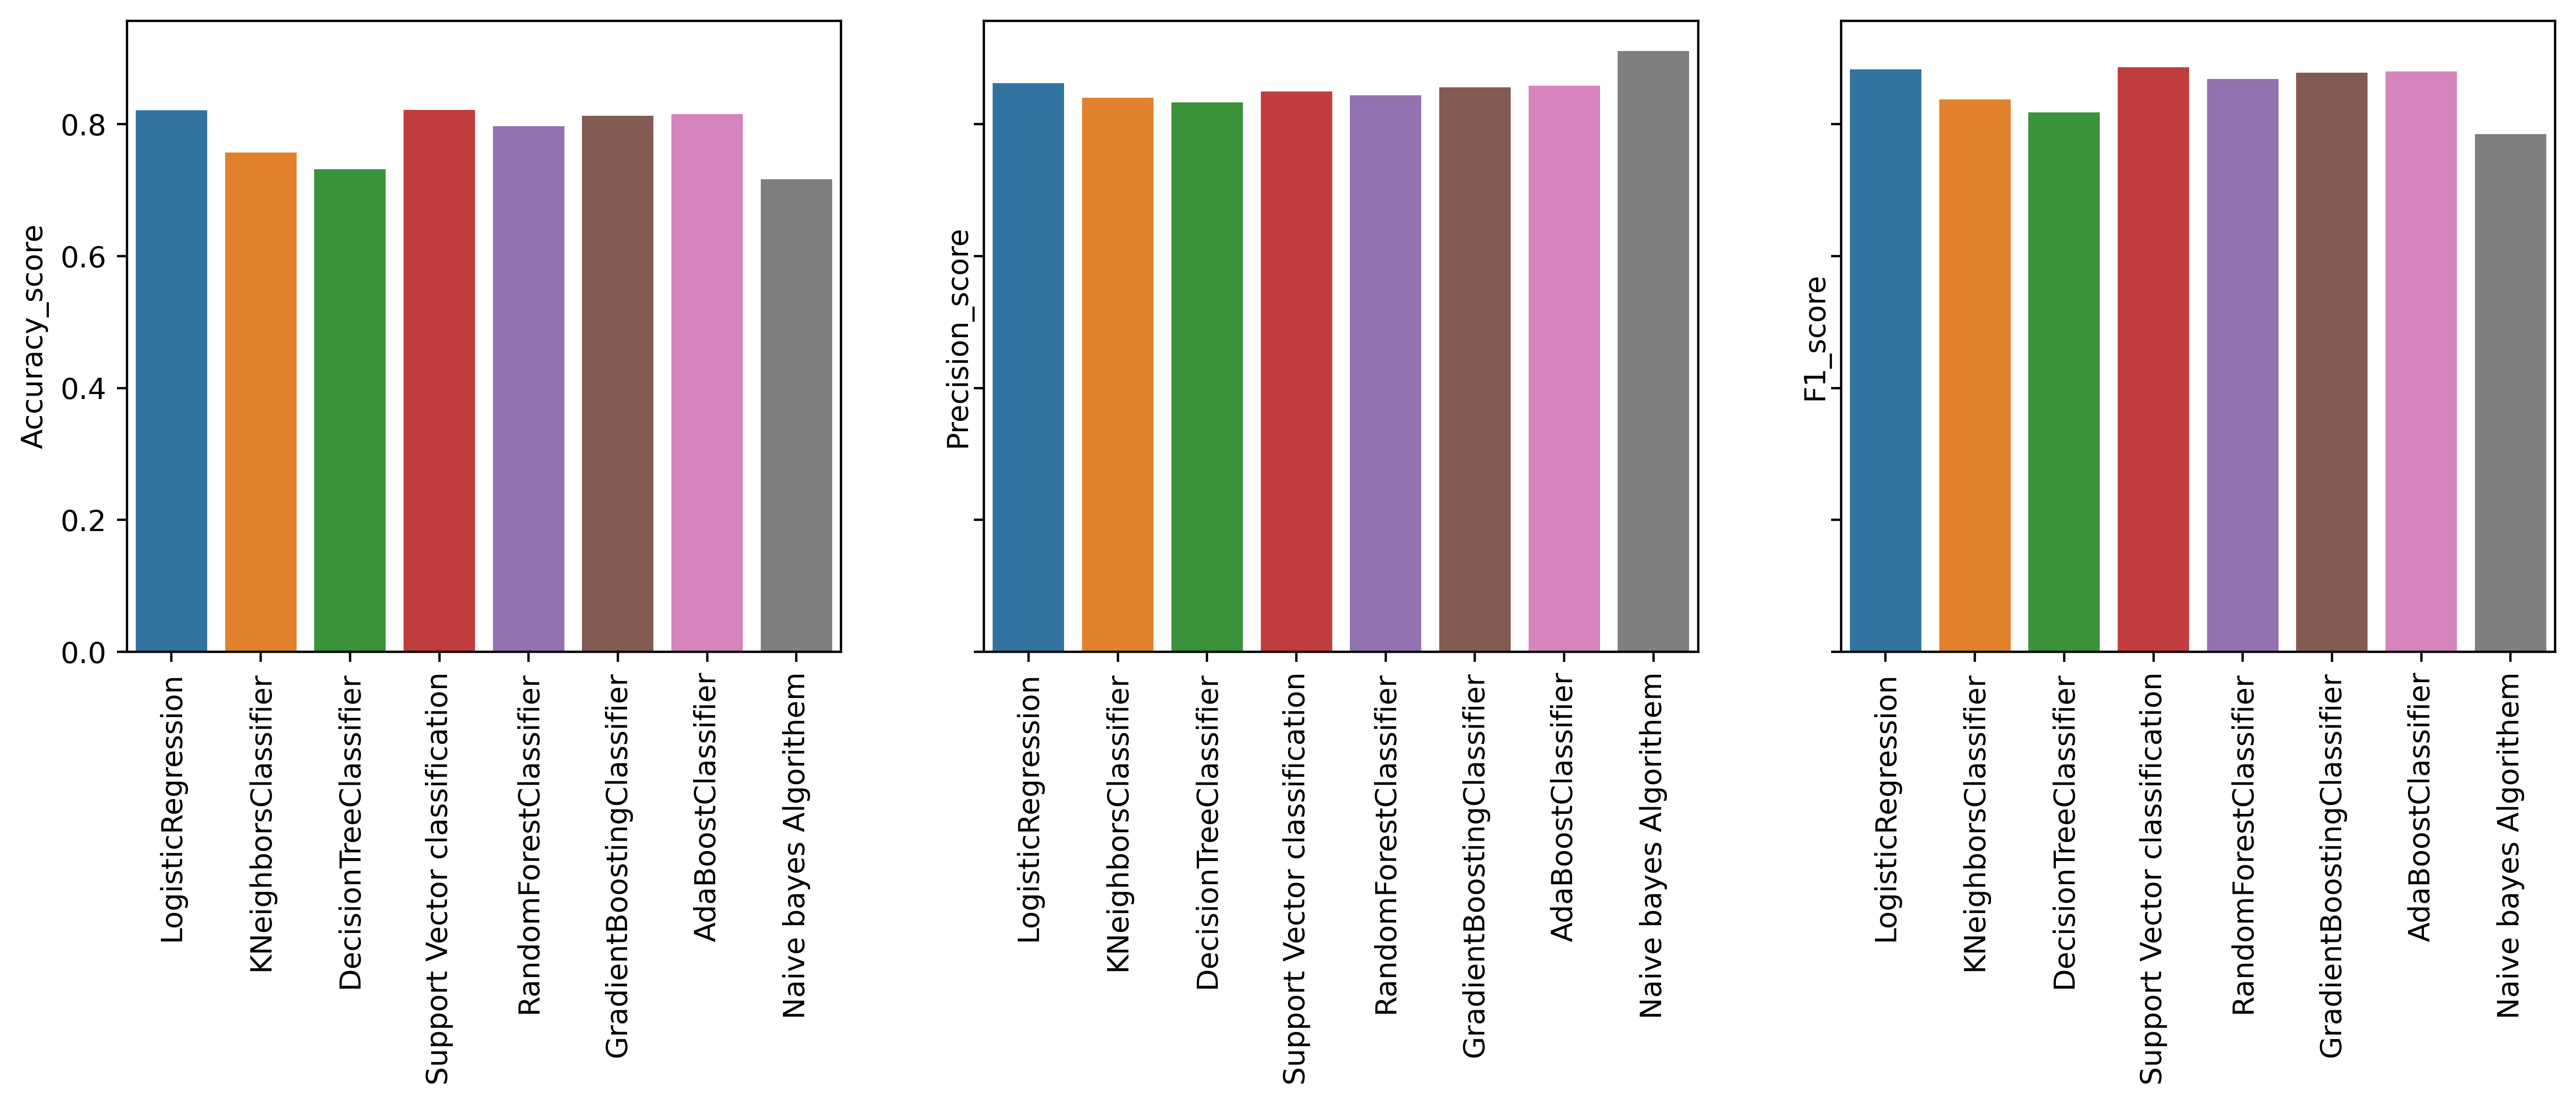

In [53]:
fig, axes = plt.subplots(1,3, figsize = (15,4),dpi=500,sharey=True)
a=overview.index
sns.barplot(y=overview.Accuracy_score,x=a,ax=axes[0])
sns.barplot(y=overview.Precision_score,x=a,ax=axes[1])
sns.barplot(y=overview.F1_score,x=a,ax=axes[2])
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.sca(axes[2])
plt.xticks(rotation=90)
plt.show()

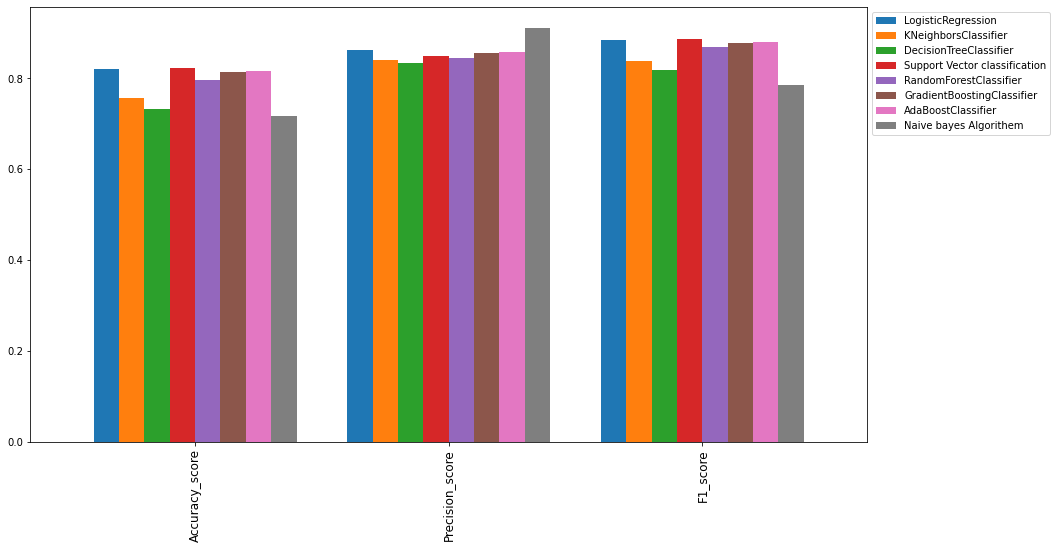

In [54]:
fig,axes=plt.subplots(figsize=(15,8))
overview.T.plot(ax=axes,kind='bar',width=0.8,align='center',alpha=1.0)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize=12);

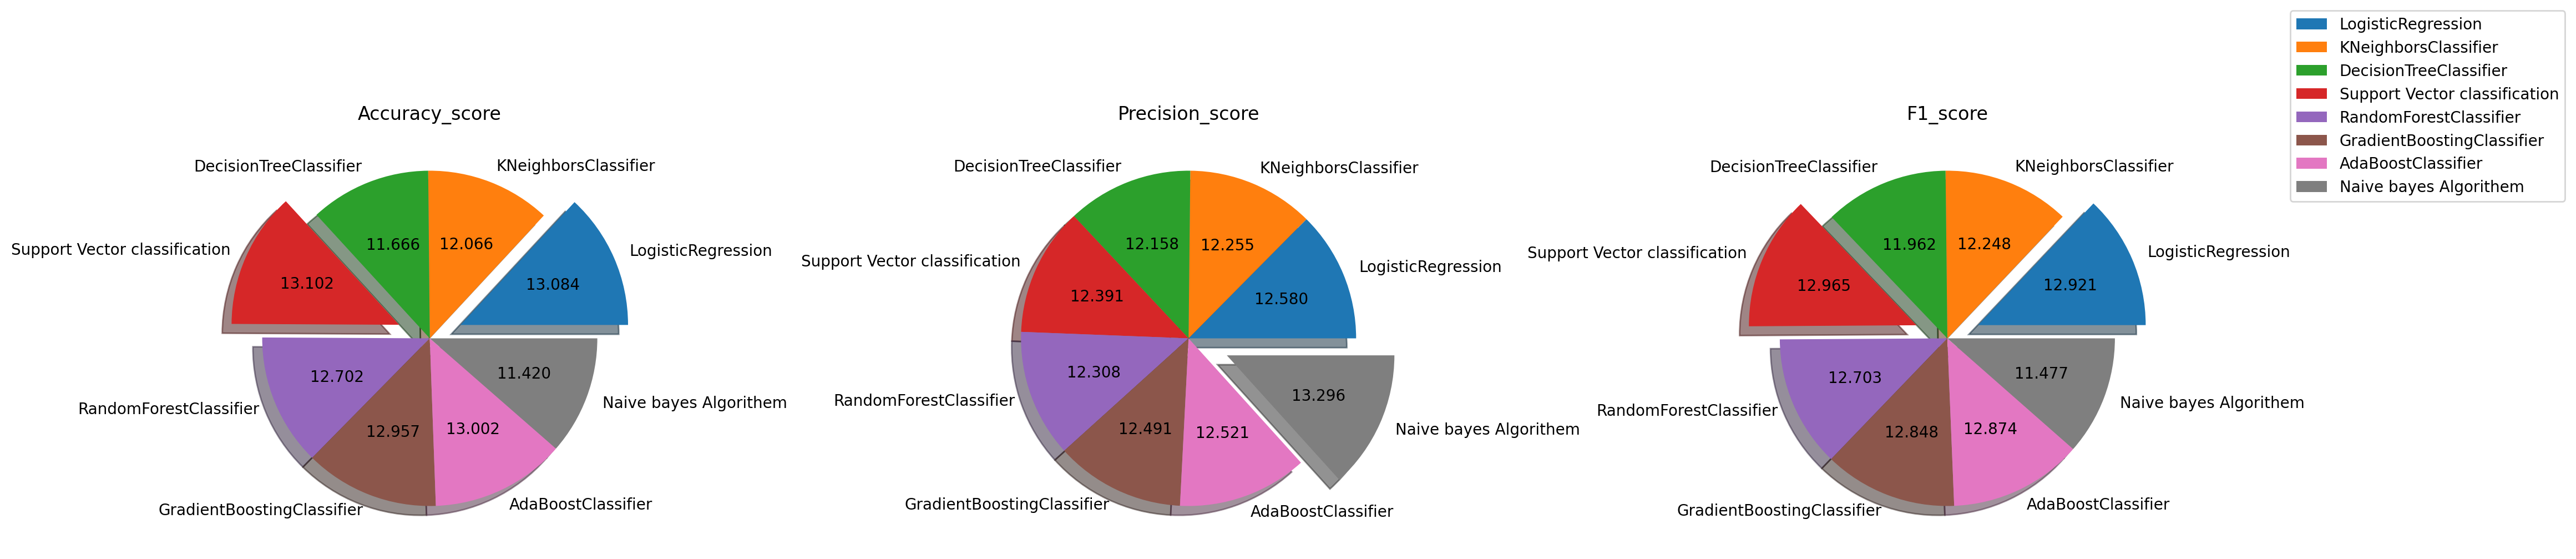

In [55]:
fig,axes=plt.subplots(1,3,figsize=(25,5),dpi=200)
overview['Accuracy_score'].plot(ax=axes[0],kind='pie',explode=[0.2,0,0,0.2,0,0,0,0],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
axes[0].title.set_text('Accuracy_score')
overview['Precision_score'].plot(ax=axes[1],kind='pie',explode=[0,0,0,0,0,0,0,0.25],ylabel=' ',autopct='%.3f',shadow=True)
axes[1].title.set_text('Precision_score')
overview['F1_score'].plot(ax=axes[2],kind='pie',explode=[0.2,0,0,0.2,0,0,0,0],ylabel=' ',autopct='%.3f',shadow=True)
plt.legend(bbox_to_anchor=(1.3,1.3));
axes[2].title.set_text('F1_score')



### Conclusion:
#### usig Accuracy_Score evalution matrix
Logestic Regression and Support Vector classification algorithms are the best model for Churn Prediction
Logestic Regression and Support Vector classification algorithms are more compare to the other models.
#### usig F1_score evalution matrix
Logestic Regression and Support Vector classification algorithms are the best model for Churn Prediction
Logestic Regression and Support Vector classification algorithms are more compare to the other models.
#### usig Precision_Score evalution matrix
Naive Bayes algorithm is the best model for Churn Prediction
Becuase Naive Bayes Accuracy is more compare to the other models.

## SPRINT 2 - Exploratory Data Analysis

In [56]:
churn=pd.read_csv("churn.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Univariate Analysis

In [57]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


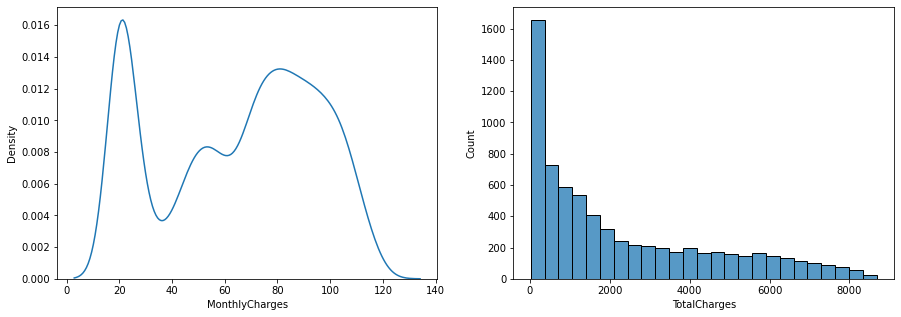

In [60]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=churn['MonthlyCharges'],data=churn,ax=axes[0])
sns.histplot(x=churn['TotalCharges'],data=churn,ax=axes[1])
plt.show()

# Observation:
- The Monthly charges have most density in the range 40-120
- The Total charges of maximum count lies between 0-2000

In [68]:
cat.drop('customerID',axis=1,inplace=True)

In [61]:
cat

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


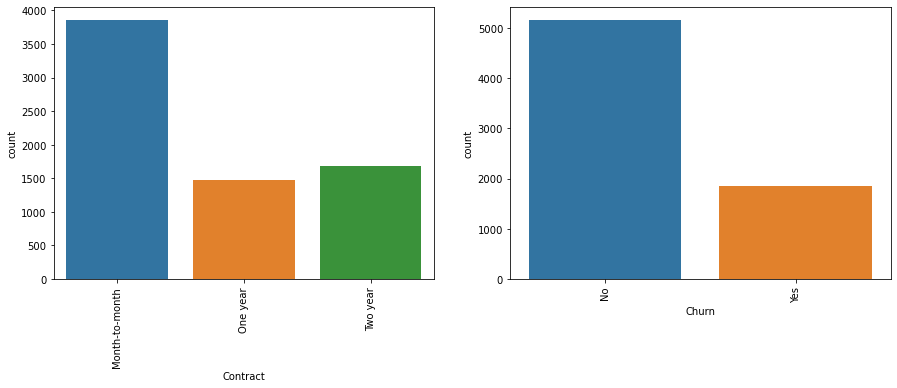

In [88]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=churn['Contract'],data=churn,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=90)
sns.countplot(x=churn['Churn'],data=churn,ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The month-to-Month contract count is more compare to one year and two year.
- In Churn No is having maximum count  comparing to yes. 

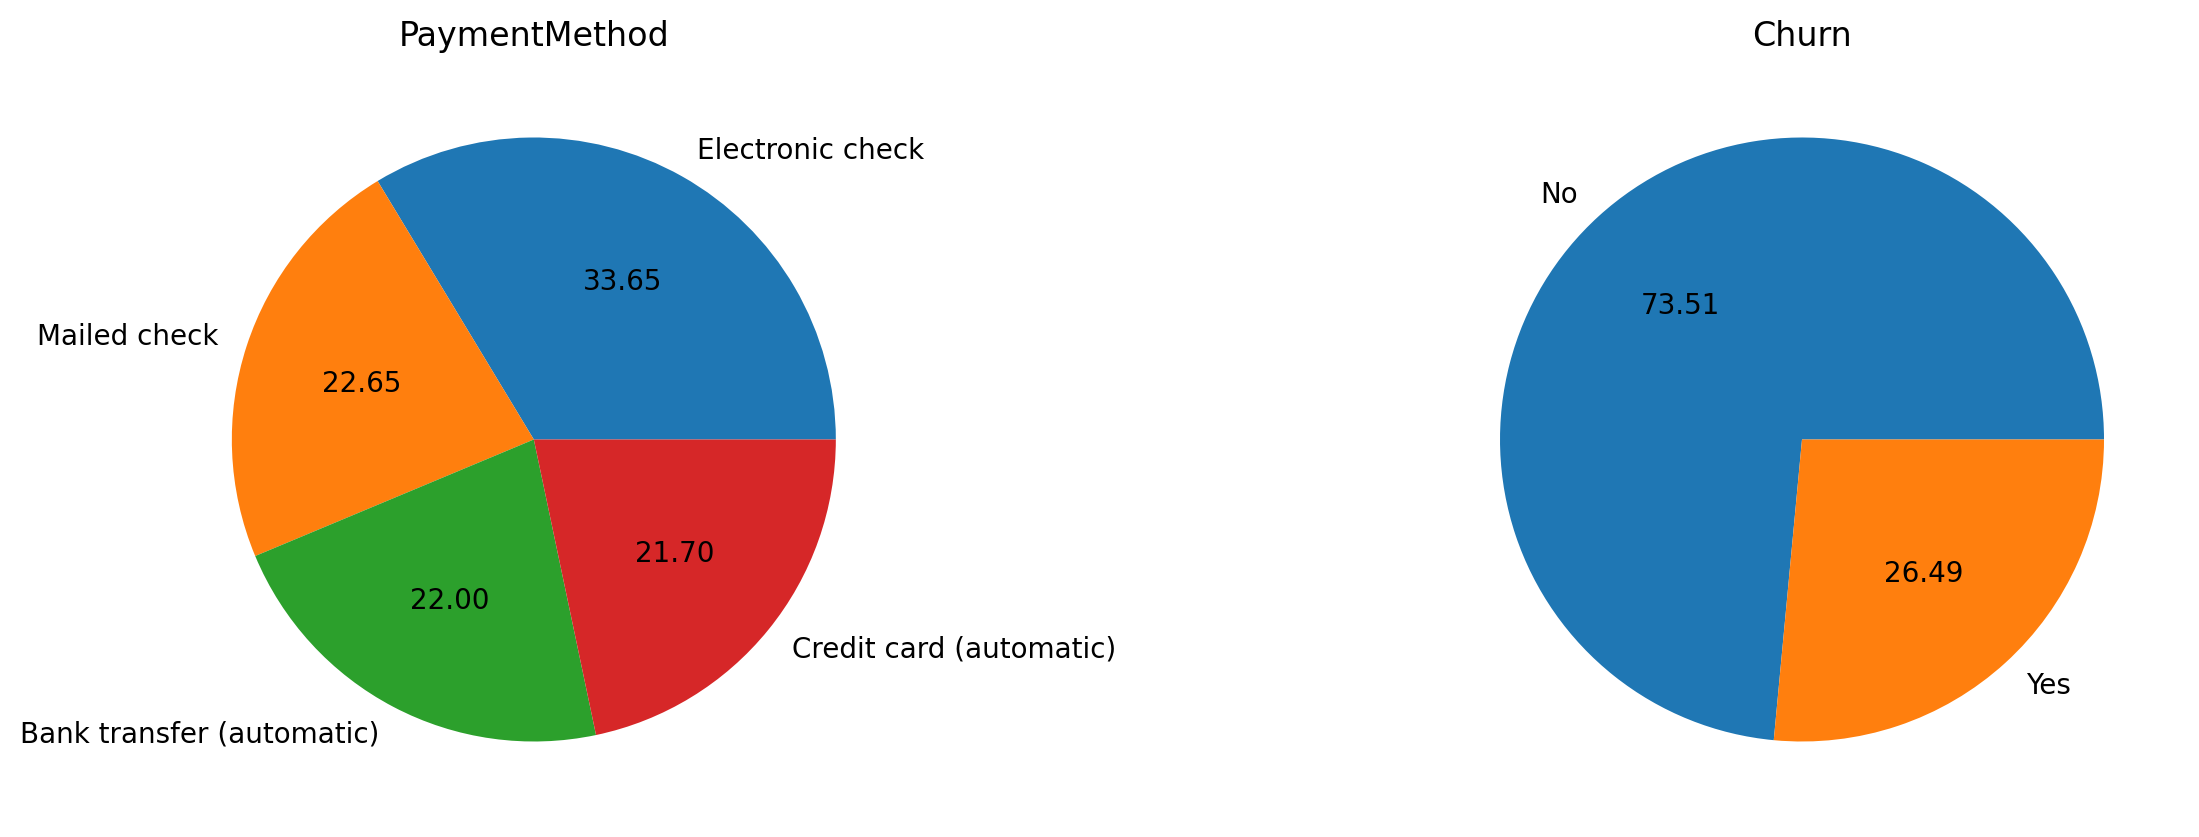

In [74]:
fig,axes=plt.subplots(1,2,figsize=(15,5),dpi=200)
churn['PaymentMethod'].value_counts().plot(kind='pie',ax=axes[0],ylabel=' ',autopct='%.2f')
axes[0].title.set_text('PaymentMethod')
churn['Churn'].value_counts().plot(kind='pie',ax=axes[1],ylabel=' ',autopct='%.2f')
axes[1].title.set_text('Churn')

# Observation:
- In payment methods The Electronic check has more percentage compare to other type of payments.
- In Churn no is occupies more percentage.

## Bi_variate analysis

In [75]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


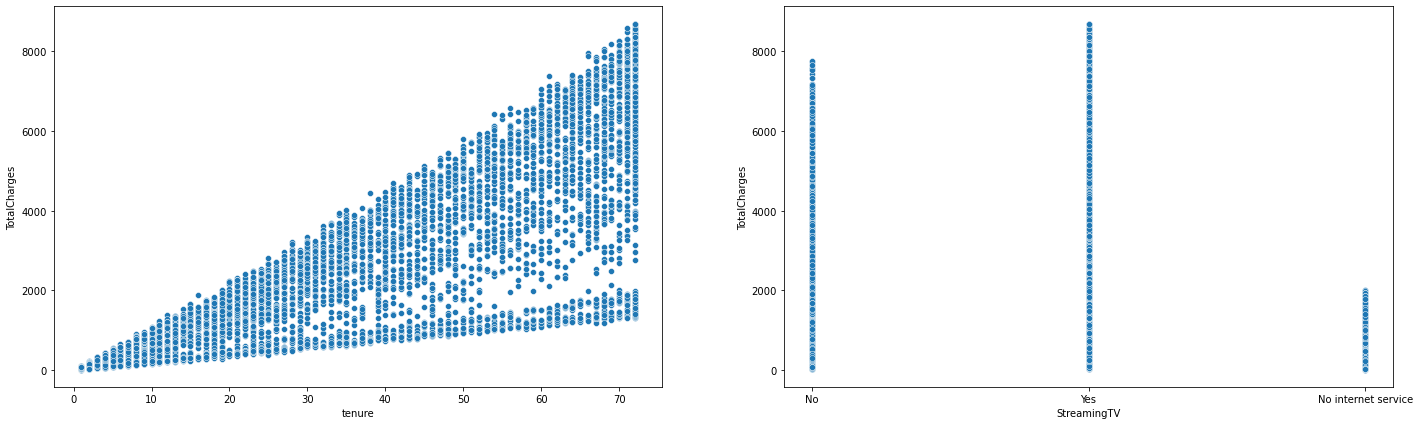

In [106]:
fig,axes=plt.subplots(1,2,figsize=(24,7))
sns.scatterplot(x=churn['tenure'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.scatterplot(x=churn['StreamingTV'],y=churn['TotalCharges'],data=churn,ax=axes[1])
plt.show()

# Observation:
- If the tenure increases the total charges are also incresed.
- In streaming Tv No internet service Total charges around 2000.

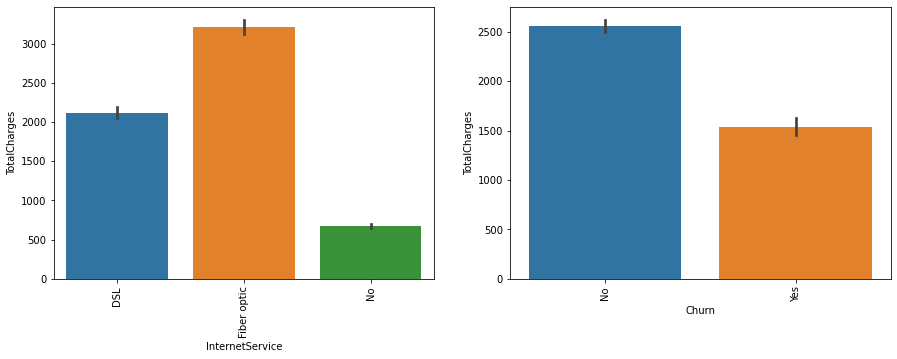

In [78]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=churn['InternetService'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.barplot(x=churn['Churn'],y=churn['TotalCharges'],data=churn)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- In internet service Fiber optic have most charges compare DSL and No
- In Churn the yes having Total_charge is around 1500.

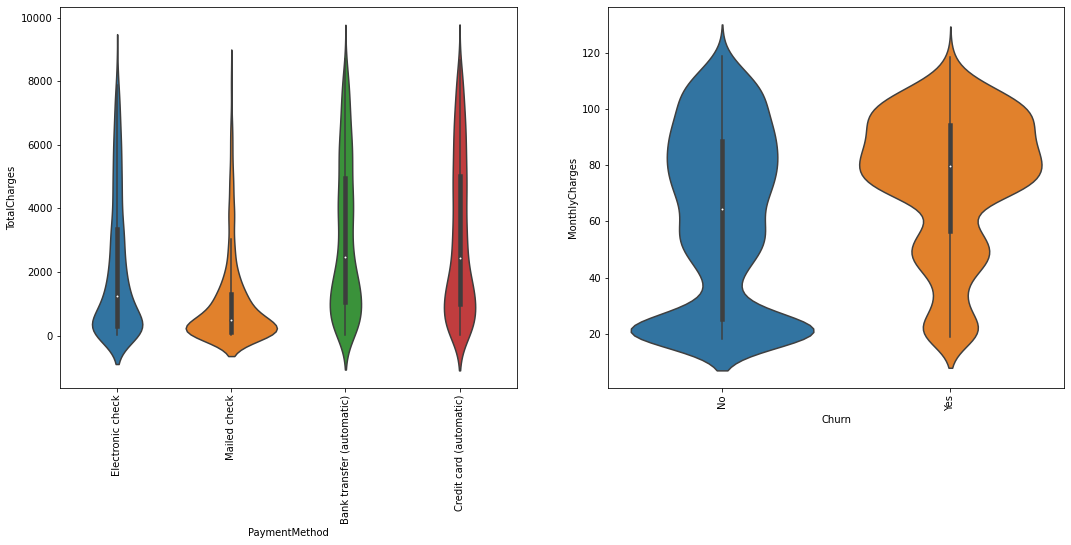

In [111]:
fig,axes=plt.subplots(1,2,figsize=(18,7))
sns.violinplot(x=churn['PaymentMethod'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.violinplot(x=churn['Churn'],y=churn['MonthlyCharges'],data=churn)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- In payment method The bank transfer automatic having most density Total_charges below 2000.
-In Churn Yes havingthe more density Monthly charges are in the rage 80-100.


In [75]:
cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


No handles with labels found to put in legend.


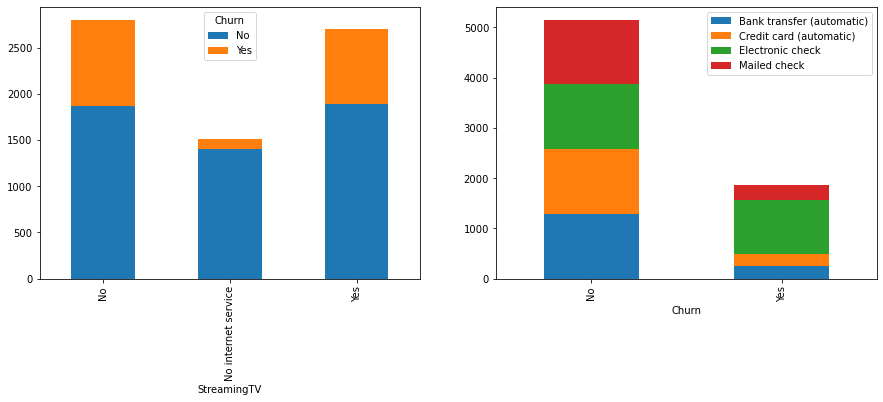

In [112]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
crosstab=pd.crosstab(churn['StreamingTV'],churn['Churn'])
crosstab.plot(kind='bar',stacked=True,ax=axes[0])
plt.legend(bbox_to_anchor=(1,1))
crosstab=pd.crosstab(churn['Churn'],churn['PaymentMethod'])
crosstab.plot(kind='bar',stacked=True,ax=axes[1])
plt.legend(bbox_to_anchor=(1,1))
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- In streaming tv evry cardinolity has less yes Churn
- In Churn yes cordinality has mastly payment method is Electronic check.

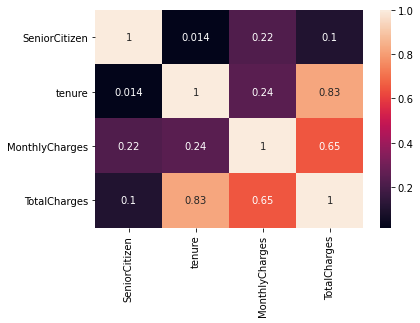

In [82]:
sns.heatmap(churn.corr(),annot=True)
plt.show()

# Observation
- tenure and Total charges has mostly positive correlation in otherend SeniorCitizen and tenure has very low positive correlation.

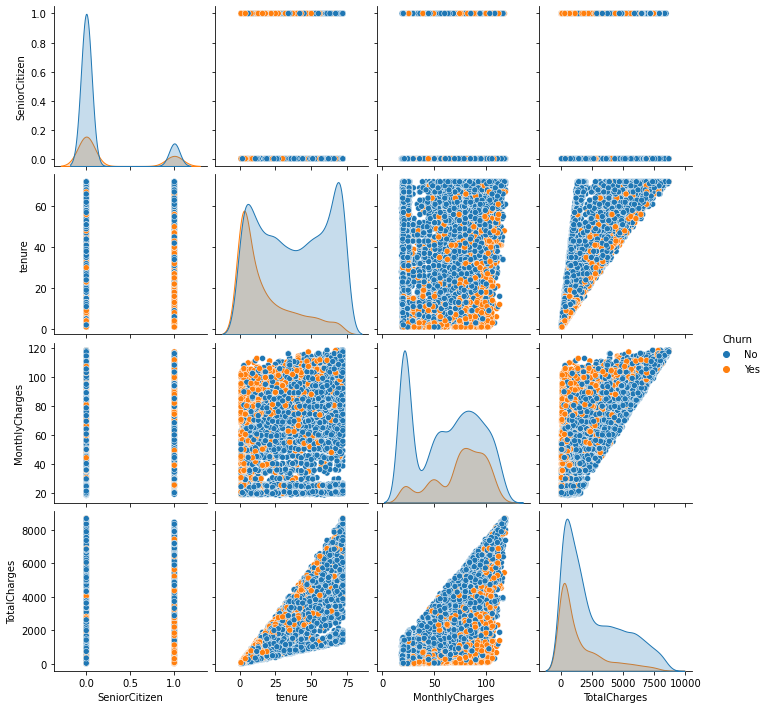

In [83]:
sns.pairplot(data=churn,hue='Churn')
plt.show()